## MDLE - Project 2

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tracks = pd.read_csv("./fma_metadata/tracks.csv", index_col=0, header=[0, 1])

tracks.shape

(106574, 52)

In [4]:
tracks = tracks.loc[tracks['set','subset'] == 'small'].reset_index(drop=True)
tracks

album                                                             
     comments         date_created        date_released        engineer   
0           0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN  \
1           0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
2           0  2008-11-26 01:45:08  2008-02-06 00:00:00             NaN   
3           1  2008-11-26 01:49:59  2007-05-22 00:00:00             NaN   
4           0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
...       ...                  ...                  ...             ...   
7995        0  2017-03-05 04:57:38  2017-03-05 00:00:00             NaN   
7996        0  2017-03-05 04:57:38  2017-03-05 00:00:00             NaN   
7997        0  2017-03-07 18:44:11                  NaN  Ernie Indradat   
7998        0  2017-03-07 18:44:11                  NaN  Ernie Indradat   
7999        0  2017-03-24 19:40:34  2017-03-24 00:00:00        JBlanked   

                                                                           
     favorites     id                                        information   
0            4      1                                            <p></p>  \
1            4      1                                            <p></p>   
2            4      6                                                NaN   
3            1     61  <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...   
4            1     60  <p>A full ensamble of strings, drums, electron...   
...        ...    ...                                                ...   
7995         0  22780                                                NaN   
7996         0  22780                                                NaN   
7997         0  22789  <p>A live performance at WFMU for Dark Night o...   
7998         0  22789  <p>A live performance at WFMU for Dark Night o...   
7999         1  22899  <p>Hip Hop, Old School type beat 2017, Trap Mu...   

                                               
     listens                        producer   
0       6073                             NaN  \
1       6073                             NaN   
2      47632                             NaN   
3       1300  Alec K. Refearn, Rob Pemberton   
4       1304                             NaN   
...      ...                             ...   
7995   22334                         Fleslit   
7996   22334                         Fleslit   
7997    3777                   Julie Bennack   
7998    3777                   Julie Bennack   
7999    4524                        JBlanked   

                                                         ...       track   
                                                   tags  ... information   
0                                                    []  ...         NaN  \
1                                                    []  ...         NaN   
2                                                    []  ...         NaN   
3                                                    []  ...         NaN   
4                                                    []  ...         NaN   
...                                                 ...  ...         ...   
7995  ['fleslit', 'trap beat free use', 'trap beat f...  ...         NaN   
7996  ['fleslit', 'trap beat free use', 'trap beat f...  ...         NaN   
7997                                                 []  ...         NaN   
7998                                                 []  ...         NaN   
7999  ['old school beats', '2017 free instrumentals'...  ...         NaN   

                              
     interest language_code   
0        4656            en  \
1        1933            en   
2       54881            en   
3        1593            en   
4         839            en   
...       ...           ...   
7995     3371           NaN   
7996     4525           NaN   
7997      809           NaN   
7998      851           NaN   
7999     2065           NaN   

                         

In [5]:
tracks.shape

(8000, 52)

In [6]:
tracks.shape[0]

8000

In [7]:
features = pd.read_csv("./fma_metadata/features.csv", encoding='utf-8-sig')
features

/var/folders/g3/kj70w42d2kz14wq0r9tqx1yr0000gn/T/ipykernel_64686/2864863714.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106572,155316,-0.490129,0.463834,2.32197,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.12841,0.022547,0.019816,4.448255,0.172852,0.028773,0.02832,0.003906,0.955388,0.012385
106573,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.28306,0.019059
106574,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.01754,0.020471,2.356727,0.212891,0.03845,0.037109,0.003418,0.828569,0.017904
106575,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.78086,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.16748,0.04148,0.038086,0.004883,1.81874,0.020133


In [8]:
first_row = features.iloc[0, :]
second_row = features.iloc[1, :]
third_row = features.iloc[2, :]

# Get the new column names from the first and second row
new_column_names = [third_row.iloc[0]] + list(first_row.iloc[1:].values)

# Rename the columns of the DataFrame
features.columns = new_column_names
features = features.iloc[3:, :].reset_index(drop=True)
features

,track_id,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
0,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.32197,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.12841,0.022547,0.019816,4.448255,0.172852,0.028773,0.02832,0.003906,0.955388,0.012385
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.28306,0.019059
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.01754,0.020471,2.356727,0.212891,0.03845,0.037109,0.003418,0.828569,0.017904
106572,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.78086,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.16748,0.04148,0.038086,0.004883,1.81874,0.020133


In [9]:
ids = list(set(tracks.index.to_list()))
features_sm = features.loc[ids]
features_sm = features_sm.drop(['track_id'], axis=1)
features_sm


print(features_sm.shape)

(8000, 518)


In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


def cluster_metrics(data, labels):
    clusters = np.unique(labels)
    radii = []
    diameters = []
    densities_r = []
    densities_d = []

    for cluster in clusters:
        cluster_data = data[labels == cluster]
        centroid = np.mean(cluster_data, axis=0)
        intra_distances = pairwise_distances(cluster_data)
        radius = np.max(np.linalg.norm(cluster_data - centroid, axis=1))
        diameter = np.max(intra_distances)
        density_r = None
        if radius == 0:
            density_r = 0
        else:
            density_r = len(cluster_data) / (radius ** 2)
        density_d = None
        if diameter == 0:
            density_d = 0
        else:
            density_d = len(cluster_data) / (diameter ** 2)
        

        radii.append(radius)
        diameters.append(diameter)
        densities_r.append(density_r)
        densities_d.append(density_d)

    return radii, diameters, densities_r, densities_d




In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = features_sm.values
X = StandardScaler().fit(X).transform(X)
df_numeric_scaled = scaler.fit_transform(features_sm.values)

results = []
for k in range(8, 17):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(df_numeric_scaled)
    
    radii, diameters, density_r, density_d = cluster_metrics(df_numeric_scaled, labels)
    
    result = {
        'k': k,
        'radii': radii,
        'diameters': diameters,
        'density_r': density_r,
        'density_d': density_d,
    }
    results.append(result)

# Print results
for result in results:
    print(f"Number of clusters (k): {result['k']}")
    print(f"Radius: {result['radii']}")
    print(f"Diameters: {result['diameters']}")
    print(f"Densities_r: {result['density_r']}")
    print(f"Densities_d: {result['density_d']}")
    print()

Number of clusters (k): 8
Radius: [179.28142275417844, 115.02873830670929, 104.4643845958334, 122.43338867336786, 107.90074127635503, 138.11429738032527, 75.10167085306476, 82.96354480334425]
Diameters: [244.0316174678465, 140.987812699309, 124.14427149326744, 156.32026768059666, 132.75321736218118, 207.17144607048795, 92.79817346704526, 165.92708960668847]
Densities_r: [0.00015556053362168642, 0.02478912121981944, 0.243841922774769, 0.17264918482620736, 0.104186618876703, 0.0001572693087446035, 0.21275611314140297, 0.0002905730926269003]
Densities_d: [8.39610396055789e-05, 0.016501016475663047, 0.1726599083192357, 0.10590920105864295, 0.06882887803604497, 6.989747055315708e-05, 0.13934852938697398, 7.264327315672509e-05]

Number of clusters (k): 9
Radius: [104.4643845958334, 115.02873830670929, 138.11429738032527, 122.43338867336786, 107.90074127635503, 111.35364136478782, 75.10167085306476, 82.96354480334425, 6.356209565333717e-15]
Diameters: [124.14427149326744, 140.987812699309, 20

#### Escolhemos k=9, porque após fazermos uma analise de todos os valores de k, este foi o que nos apresentou um menor raio e diametro e com valores de densidade maiores.

In [12]:
from sklearn.cluster import KMeans

def bfr_clustering_v2(data, n_clusters, init='k-means++', random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=random_state)
    kmeans.fit(data)
    cluster_centers_ = kmeans.cluster_centers_
    labels_ = kmeans.labels_

    # Initialize cluster summary statistics
    cluster_stats_ = []
    for i in range(n_clusters):
        cluster_data = data[labels_ == i]
        n = len(cluster_data)
        cluster_sum = cluster_data.sum(axis=0)
        cluster_sum_sq = (cluster_data ** 2).sum(axis=0)
        cluster_stats_.append({'n': n, 'sum': cluster_sum, 'sum_sq': cluster_sum_sq})

    return labels_, cluster_centers_

data = pd.read_csv('./fma_metadata/features.csv', header=[0, 1, 2], index_col=0)

data.columns = ['_'.join(col).strip() for col in data.columns.values]

#drop any missing values
data = data.dropna()

#cluster the dataset using the bfr_clustering_v2 function with k=9
labels, cluster_centers = bfr_clustering_v2(data, n_clusters=9, init='k-means++', random_state=42)

print("Cluster assignments:", labels)
print("Cluster centers:", cluster_centers)


/Users/sobral/Desktop/mei/mdle/mdle-assignment-2/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignments: [1 2 1 ... 0 0 5]
Cluster centers: [[1.19249563e-01 3.69668137e-02 1.44263206e-01 ... 2.02810419e-03
  2.91189132e+00 3.30867050e-02]
 [2.59757800e-01 1.48969400e-01 3.33045900e-01 ... 2.18012286e-03
  2.25145462e+00 4.31610999e-02]
 [2.83229288e-01 2.19626972e-01 3.32465034e-01 ... 1.79118247e-03
  2.08966531e+00 6.41490344e-02]
 ...
 [1.10800694e-01 1.59182307e-02 9.46648607e-02 ... 3.58960052e-03
  2.57837479e+00 2.44054399e-02]
 [1.06084312e+00 5.48613965e-01 6.33136734e-01 ... 1.75094569e-03
  5.03980092e+00 2.28069917e-02]
 [8.60739059e-01 5.25370561e-01 6.43285090e-01 ... 5.46358686e-03
  1.23962321e+00 9.14760565e-02]]


In [13]:
from scipy.spatial.distance import mahalanobis

def calculate_inverse_covariance_matrices(data, labels, cluster_centers):
    inverse_cov_matrices = []
    for i in range(cluster_centers.shape[0]):
        cluster_data = data[labels == i]
        cov_matrix = np.cov(cluster_data.T)
        inv_cov_matrix = np.linalg.pinv(cov_matrix)
        inverse_cov_matrices.append(inv_cov_matrix)
    return inverse_cov_matrices

inverse_cov_matrices = calculate_inverse_covariance_matrices(data, labels, cluster_centers)

#calculate the Mahalanobis distances for each data point to its assigned centroid
mahalanobis_distances = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    cluster_idx = labels[i]
    centroid = cluster_centers[cluster_idx]
    inv_cov_matrix = inverse_cov_matrices[cluster_idx]
    mahalanobis_distances[i] = mahalanobis(data.iloc[i], centroid, inv_cov_matrix)

print("Mahalanobis distances:", mahalanobis_distances)

Mahalanobis distances: [19.48828704 18.25155341 19.11146893 ... 15.37232497 16.92043933
 16.42708935]


In [14]:
# Function to calculate the average Mahalanobis distance and standard deviation for each cluster
def calculate_cluster_mahalanobis_stats(labels, mahalanobis_distances, n_clusters):
    cluster_stats = []
    for i in range(n_clusters):
        cluster_distances = mahalanobis_distances[labels == i]
        mean_distance = np.mean(cluster_distances)
        std_distance = np.std(cluster_distances)
        cluster_stats.append({'mean': mean_distance, 'std': std_distance})
    return cluster_stats

std_multiplier = 2

cluster_stats = calculate_cluster_mahalanobis_stats(labels, mahalanobis_distances, 9)

new_labels = np.zeros_like(labels)

# Assign each point to a cluster or mark it as unassigned (-1) based on the threshold
for i in range(data.shape[0]):
    cluster_idx = labels[i]
    threshold = cluster_stats[cluster_idx]['mean'] + std_multiplier * cluster_stats[cluster_idx]['std']
    if mahalanobis_distances[i] <= threshold:
        new_labels[i] = cluster_idx
    else:
        new_labels[i] = -1

print("New cluster assignments:", new_labels)

New cluster assignments: [1 2 1 ... 0 0 5]


In [15]:
from collections import defaultdict

#function to create a dictionary with the keys being the clusters and the values being lists of all the data points belonging to each cluster
def create_cluster_dictionary(data, labels):
    cluster_dict = defaultdict(list)
    for i in range(data.shape[0]):
        cluster_idx = labels[i]
        cluster_dict[cluster_idx].append(data.iloc[i].values)
    return cluster_dict

cluster_dictionary = create_cluster_dictionary(data, new_labels)

print("Cluster dictionary:")
for key, value in cluster_dictionary.items():
    print(f"Cluster {key}: {len(value)} points")

Cluster dictionary:
Cluster 1: 20621 points
Cluster 2: 11357 points
Cluster 7: 20918 points
Cluster 0: 27485 points
Cluster 4: 4036 points
Cluster 8: 2932 points
Cluster 5: 7958 points
Cluster 6: 5686 points
Cluster 3: 2241 points
Cluster -1: 3340 points


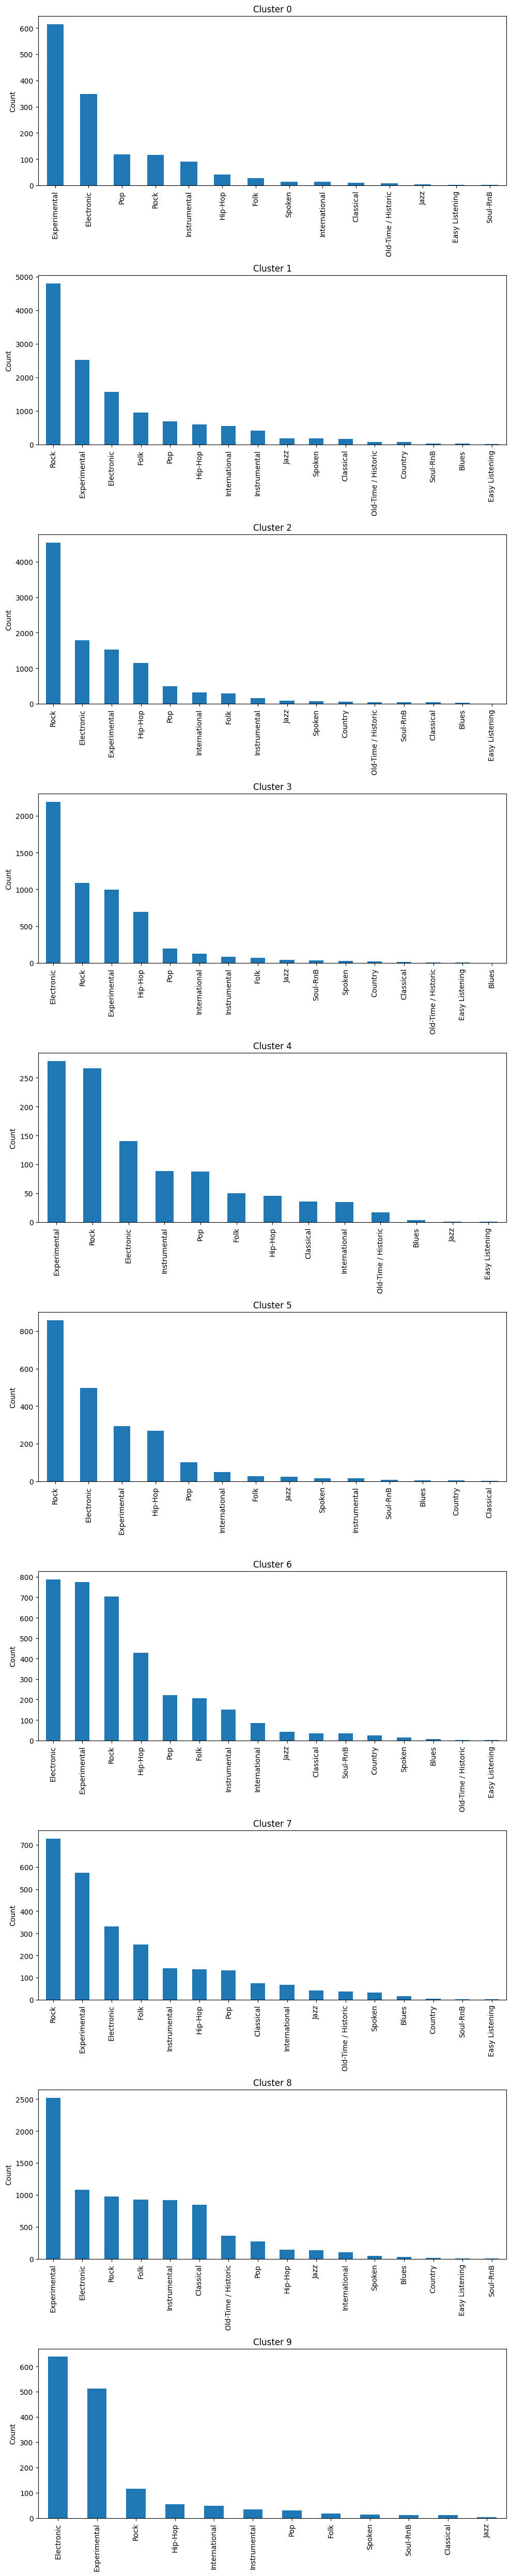

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the tracks.csv file
tracks = pd.read_csv('fma_metadata/tracks.csv', header=[0, 1], index_col=0)

# Flatten the hierarchical column names
tracks.columns = ['_'.join(col).strip() for col in tracks.columns.values]

# Extract the genre information for each track
genres = tracks['track_genre_top']

# Map the genre information to the cluster assignments
data_genres = data.assign(genre=genres).dropna(subset=['genre'])

# Update new_labels' indices to match data_genres
new_labels_aligned = pd.Series(new_labels, index=data.index)

# Group genres by the new_labels_aligned
cluster_genres = data_genres.loc[:, 'genre'].groupby(new_labels_aligned).agg(list)

# Function to calculate the genre count for each cluster
def calculate_genre_count(cluster_genres):
    genre_counts = []
    for i, genres in cluster_genres.items():
        genre_count = pd.Series(genres).value_counts()
        genre_counts.append(genre_count)
    return genre_counts

# Calculate the genre count for each cluster
genre_counts = calculate_genre_count(cluster_genres)

# Create a bar chart to visualize the total count of music genres in each cluster
def plot_genre_counts(genre_counts):
    fig, axes = plt.subplots(nrows=len(genre_counts), ncols=1, figsize=(10, 5 * len(genre_counts)))

    for i, ax in enumerate(axes):
        genre_counts[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_genre_counts(genre_counts)
